In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv('movie.csv')
ratings = pd.read_csv('rating.csv')

Exploratory Data Analysis (EDA)

In [3]:
# Function to correct the title format
import re
def correct_title(title):
    match = re.match(r'^(.*), The \((\d{4})\)$', title)
    if match:
        movie_name = match.group(1)
        year = match.group(2)
        return f'The {movie_name} ({year})'
    else:
        return title
#regular expressions to identify movie titles in the format "Movie Name, The (Year)"

In [4]:
movies['title'] = movies['title'].apply(correct_title)

In [5]:
movies.shape

(27278, 3)

In [6]:
# Check the data types and missing values
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [7]:
# Summary statistics for numeric columns
movies.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


<Axes: >

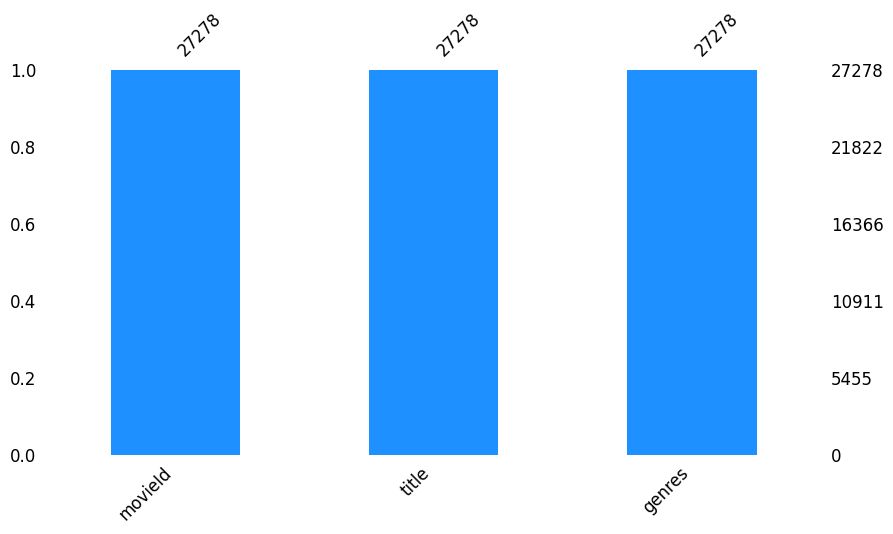

In [8]:
msno.bar(movies, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<Axes: >

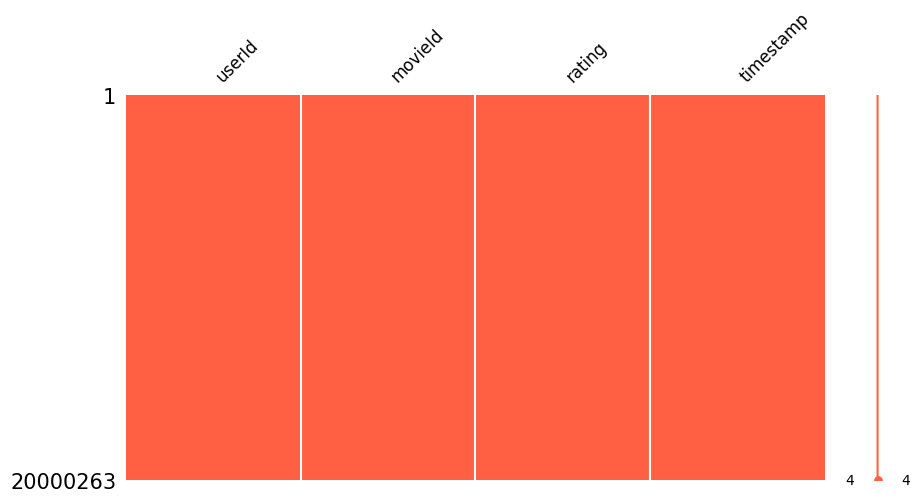

In [9]:
msno.matrix(ratings, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))

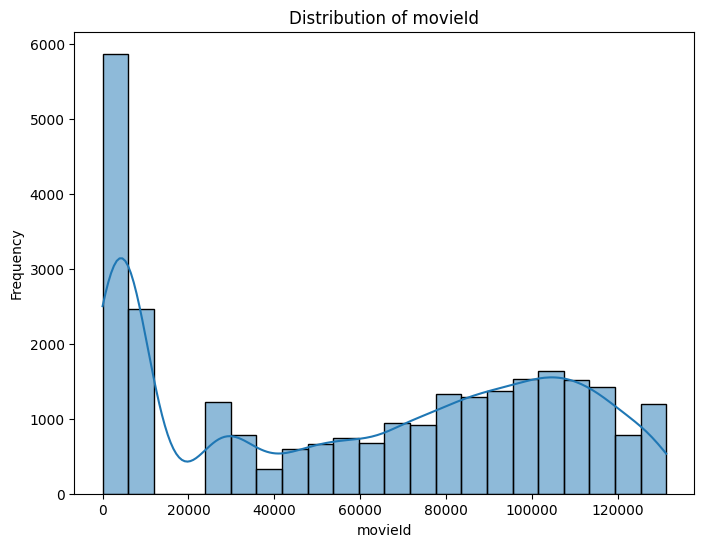

In [10]:
# Explore the distribution of numeric columns
numeric_columns = movies.select_dtypes(include=['int64', 'float64'])
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(movies[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

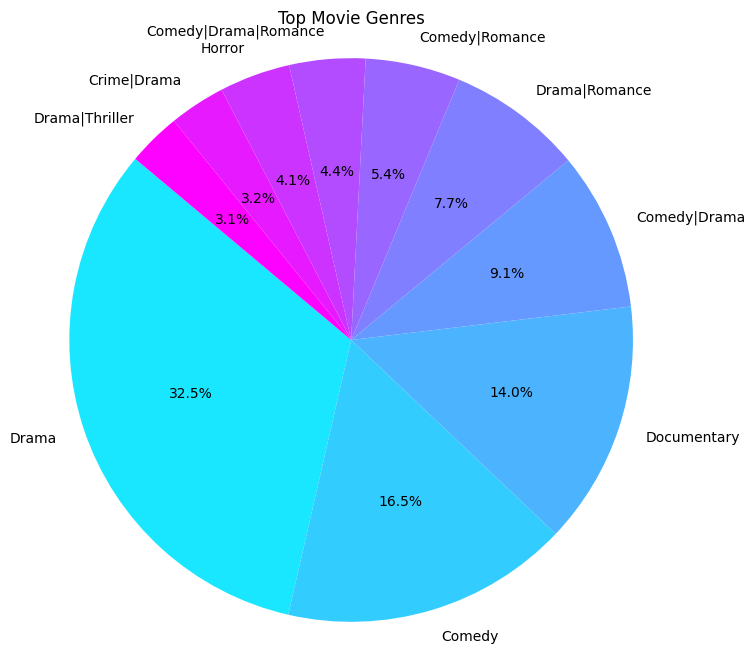

In [11]:
a = plt.cm.cool

top_genres = movies['genres'].explode().value_counts().head(10)
colors = [a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)]

plt.figure(figsize=(8, 8))
plt.pie(top_genres.values, labels=top_genres.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Movie Genres')
plt.axis('equal')

plt.show()

In [12]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [13]:
ratings.shape

(20000263, 4)

In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [15]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [16]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [17]:
#Checking and Remove Missing data
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [18]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [19]:
movies.duplicated().sum()

0

In [20]:
ratings.duplicated().sum()

0

Popularity Based Recommender System

In [21]:
#Merging the datasets using movieId on ratings
ratings_with_name = ratings.merge(movies,on='movieId')

In [22]:
ratings_with_name.shape

(20000263, 6)

In [23]:
ratings_with_name.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [24]:
#checking how many votes are given to a movie
num_rating_df = ratings_with_name.groupby('title').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)
num_rating_df

,title,num_ratings
0,#chicagoGirl: The Social Network Takes on a Di...,3
1,$ (Dollars) (1971),24
2,$5 a Day (2008),39
3,$9.99 (2008),55
4,$ellebrity (Sellebrity) (2012),2
...,...,...
26723,À propos de Nice (1930),4
26724,Árido Movie (2005),1
26725,Åsa-Nisse - Wälkom to Knohult (2011),2
26726,Üvegtigris (2001),1


In [25]:
#Identify the non-numeric values in the 'rating' column.
ratings_with_name['rating'] = pd.to_numeric(ratings_with_name['rating'], errors='coerce')

In [26]:
#checking for average rating addition of all ratings divided by total no. of ratings
avg_rating_df = ratings_with_name.groupby('title')['rating'].mean().reset_index()
avg_rating_df.rename(columns={'rating':'avg_ratings'}, inplace=True)
avg_rating_df

,title,avg_ratings
0,#chicagoGirl: The Social Network Takes on a Di...,3.666667
1,$ (Dollars) (1971),2.833333
2,$5 a Day (2008),2.871795
3,$9.99 (2008),3.009091
4,$ellebrity (Sellebrity) (2012),2.000000
...,...,...
26723,À propos de Nice (1930),3.125000
26724,Árido Movie (2005),2.000000
26725,Åsa-Nisse - Wälkom to Knohult (2011),1.500000
26726,Üvegtigris (2001),3.000000


In [27]:
popular_df = num_rating_df.merge(avg_rating_df,on='title')
popular_df

,title,num_ratings,avg_ratings
0,#chicagoGirl: The Social Network Takes on a Di...,3,3.666667
1,$ (Dollars) (1971),24,2.833333
2,$5 a Day (2008),39,2.871795
3,$9.99 (2008),55,3.009091
4,$ellebrity (Sellebrity) (2012),2,2.000000
...,...,...,...
26723,À propos de Nice (1930),4,3.125000
26724,Árido Movie (2005),1,2.000000
26725,Åsa-Nisse - Wälkom to Knohult (2011),2,1.500000
26726,Üvegtigris (2001),1,3.000000


In [28]:
#only keeping the movies which has ratings above 250
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)

In [29]:
popular_df.merge(movies,on='title').drop_duplicates('title').shape

(50, 5)

In [30]:
popular_df

,title,num_ratings,avg_ratings
23254,The Shawshank Redemption (1994),63366,4.446990
21331,The Godfather (1972),41355,4.364732
23766,The Usual Suspects (1995),47006,4.334372
17473,Schindler's List (1993),50054,4.310175
21332,The Godfather: Part II (1974),27398,4.275641
17697,Seven Samurai (Shichinin no samurai) (1954),11611,4.274180
16518,Rear Window (1954),17449,4.271334
1874,Band of Brothers (2001),4305,4.263182
3729,Casablanca (1942),24349,4.258327
19291,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),6525,4.256935


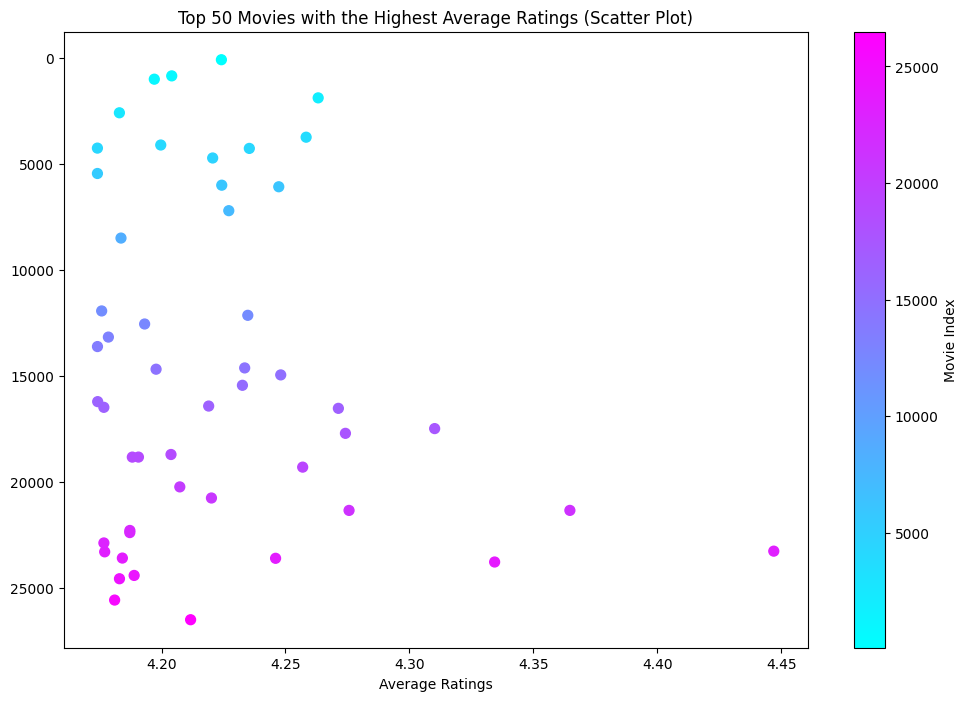

In [31]:
# Select the top 50 movies with the highest average ratings
top_50_movies = popular_df.head(50)

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(top_50_movies['avg_ratings'], top_50_movies.index, c=top_50_movies.index, cmap='cool', s=50)
plt.xlabel('Average Ratings')
plt.title('Top 50 Movies with the Highest Average Ratings (Scatter Plot)')
plt.gca().invert_yaxis()
plt.colorbar(label='Movie Index', orientation='vertical')

plt.show()

Collaborative Filtering Based Recommender System

In [32]:
#only keeping the user who has given above 200 ratings
x = ratings_with_name.groupby('userId').count()['rating'] > 200
cf_users = x[x].index

In [33]:
#boolean series
filtered_rating = ratings_with_name[ratings_with_name['userId'].isin(cf_users)]

In [34]:
#only keeping the movies who has given above 50 ratings
y = filtered_rating.groupby('title').count()['rating']>=50
famous_movies = y[y].index

In [35]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_movies)]

In [36]:
#creating a table
pt = final_ratings.pivot_table(index='title',columns='userId',values='rating')

In [37]:
pt.fillna(0,inplace=True)

In [38]:
pt

userId,7,11,14,24,31,53,54,58,69,82,...,138456,138457,138459,138464,138467,138472,138474,138477,138483,138493
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#we will calculate the distance between every movie for movie using:cosine angle
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
similarity_scores = cosine_similarity(pt)

In [41]:
similarity_scores.shape

(10078, 10078)

In [42]:
def recommend(movie_name):
    # Search for the exact movie name in pt.index
    matching_indices = [i for i, name in enumerate(pt.index) if movie_name in name]

    if matching_indices:
        index = matching_indices[0]
        similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
        for i in similar_items:
            print(pt.index[i[0]])
    else:
        print(f"Movie '{movie_name}' not found in the dataset.")

In [43]:
recommend('Cars 2')

Rio (2011)
Kung Fu Panda 2 (2011)
Planes (2013)
Monsters University (2013)
Madagascar 3: Europe's Most Wanted (2012)


In [44]:
pt.index[10077]

'À nous la liberté (Freedom for Us) (1931)'

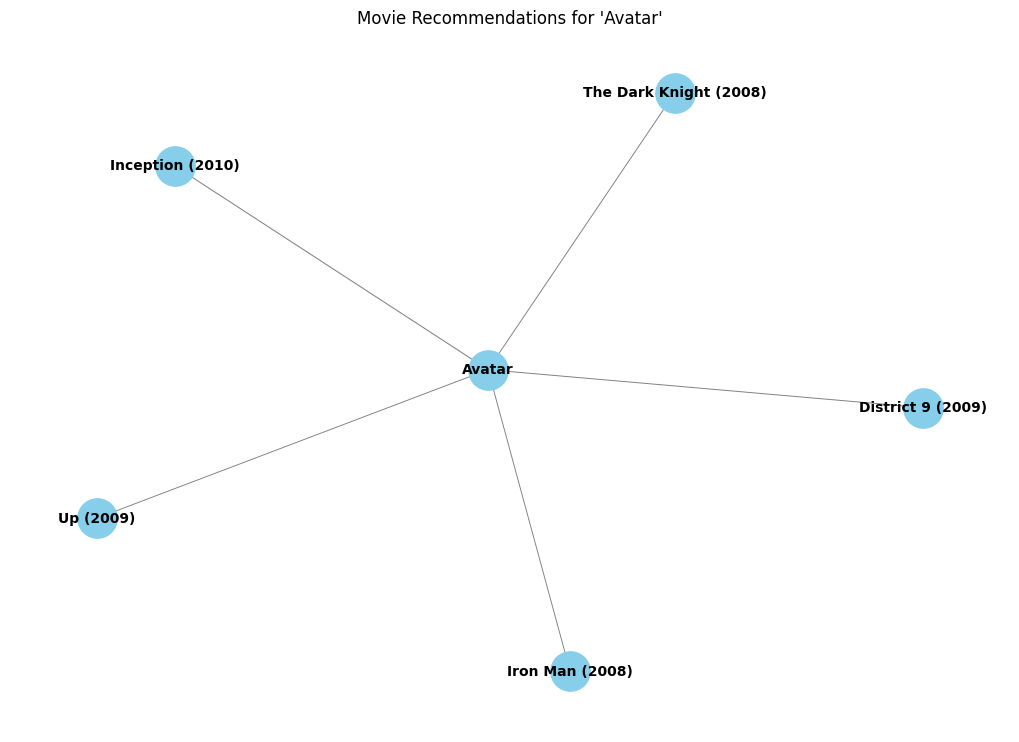

In [45]:
def recommend(movie_name):
    matching_indices = [i for i, name in enumerate(pt.index) if movie_name in name]

    if matching_indices:
        index = matching_indices[0]
        similar_items = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:6]
        
        G = nx.Graph()

        G.add_node(movie_name)
        G.add_edges_from((movie_name, pt.index[i], {'weight': score}) for i, score in similar_items)

        pos = nx.spring_layout(G)
        labels = {node: node for node in G.nodes()}
        weights = [G[u][v]['weight'] for u, v in G.edges()]

        plt.figure(figsize=(10, 7))
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, font_size=10, node_color='skyblue', font_color='black', font_weight='bold', width=weights, edge_color='gray', edge_cmap=plt.cm.Blues)
        plt.title(f"Movie Recommendations for '{movie_name}'")
        plt.show()
    else:
        print(f"Movie '{movie_name}' not found in the dataset.")

recommend('Avatar')

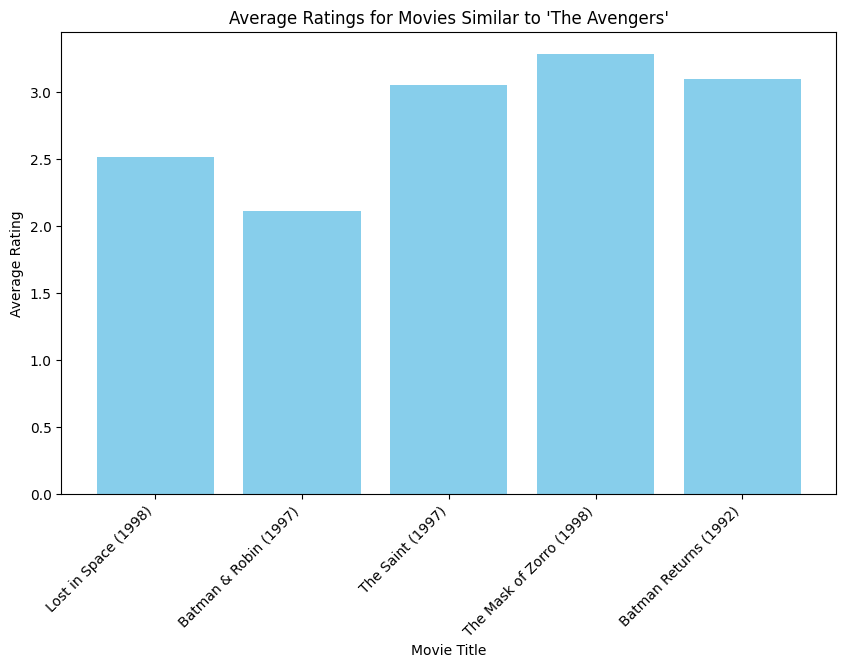

In [46]:
def recommend(movie_name):
    matching_indices = [i for i, name in enumerate(pt.index) if movie_name in name]

    if matching_indices:
        index = matching_indices[0]
        similar_items = sorted(enumerate(similarity_scores[index]), key=lambda x: x[1], reverse=True)[1:6]
        
        similar_movie_names = [pt.index[i[0]] for i in similar_items]
        average_ratings = [final_ratings[final_ratings['title'] == movie]['rating'].mean() for movie in similar_movie_names]

        plt.figure(figsize=(10, 6))
        plt.bar(similar_movie_names, average_ratings, color='skyblue')
        plt.title(f"Average Ratings for Movies Similar to '{movie_name}'")
        plt.xlabel('Movie Title')
        plt.ylabel('Average Rating')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print(f"Movie '{movie_name}' not found in the dataset.")

recommend('The Avengers')

In [47]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [48]:
pickle.dump(pt,open('pt_collaborative.pkl','wb'))
pickle.dump(movies,open('movies_collaborative.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_collaborative.pkl','wb'))

In [ ]:
import gzip
import pickle

with gzip.open('pt_collaborative.pkl.gz', 'wb') as file:
    pickle.dump(pt, file)

with gzip.open('movies_collaborative.pkl.gz', 'wb') as file:
    pickle.dump(movies, file)

with gzip.open('similarity_collaborative.pkl.gz', 'wb') as file:
    pickle.dump(similarity_scores, file)